In [1]:
#import libraries 
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pathlib import Path
import alpaca_trade_api as tradeapi
import yfinance as yf
from dateutil import parser

#Set matplotlib to display plots inline
%matplotlib inline

# Load .env enviroment variables
load_dotenv()

False

In [2]:
#Reading the data
congress_trading = pd.read_csv(Path("congress-trading-all.csv"))
congress_trading

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range
0,2023-10-15,2023-09-15,VZ,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
1,2023-10-15,2023-09-15,SHLS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2,2023-10-15,2023-09-15,FOXF,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
3,2023-10-15,2023-09-15,FSLR,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
4,2023-10-15,2023-09-15,FIS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...,...,...
31698,NaN,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31699,NaN,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31700,NaN,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31701,NaN,2014-07-25,AMAT,Richard Burr,Sale,15001.0,R,Senate,"$15,001-$50,000"


In [3]:
#Drop the ReportDate Column, we won't be using it for our study
congress_trading = congress_trading.drop(columns=["ReportDate"])
congress_trading

,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range
0,2023-09-15,VZ,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
1,2023-09-15,SHLS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2,2023-09-15,FOXF,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
3,2023-09-15,FSLR,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
4,2023-09-15,FIS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...,...
31698,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31699,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31700,2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
31701,2014-07-25,AMAT,Richard Burr,Sale,15001.0,R,Senate,"$15,001-$50,000"


In [4]:
#Convert the TransactionDate Column to date-time format and set it as index
congress_trading["TransactionDate"] = pd.to_datetime(congress_trading["TransactionDate"])
congress_trading.set_index('TransactionDate', inplace=True)
congress_trading

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-15,VZ,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,SHLS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FOXF,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FSLR,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FIS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"
2014-08-29,MLM,Richard Burr,Sale,1001.0,R,Senate,"$1,001-$15,000"


In [5]:
gott_transactions = congress_trading[congress_trading['Representative']=='Josh Gottheimer']
amount_counts = gott_transactions['Amount'].value_counts()
amount_counts

Amount
1001.0      2072
15001.0       42
100001.0       4
50001.0        3
Name: count, dtype: int64

In [6]:
gott_transactions

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-15,VZ,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,SHLS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FOXF,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FSLR,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FIS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2017-09-22,AIQUY,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2017-06-26,DASTY,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2017-11-07,ISRG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


In [7]:
#Check for NaN values
na_counts = congress_trading.isnull().sum()
na_counts

Ticker            0
Representative    0
Transaction       0
Amount            0
Party             0
House             0
Range             0
dtype: int64

In [8]:
#Find the most active members from Democratic Party
representative_democrats = ['D']
democrats_transactions = congress_trading[congress_trading['Party'].isin(representative_democrats)]
trading_counts_dem = democrats_transactions['Representative'].value_counts()
trading_counts_dem

Representative
Josh Gottheimer     2121
Gilbert Cisneros    1218
Susie Lee           1192
Daniel Goldman      1136
Dean Phillips        963
                    ... 
Tim Kaine              1
Lori Trahan            1
Joe Manchin            1
Grace Meng             1
Derek Kilmer           1
Name: count, Length: 97, dtype: int64

With some research, we're able to say Josh Gottheimer and Susie Lee are the two most active traders who served as a US Representative from Democratic Party in selected time period. These two US Representatives portfolios will be studied.

In [9]:
#Filtering Josh Gottheimer's transactions
representative_1_dem = ["Josh Gottheimer"]
gottheimer_transactions = congress_trading[congress_trading["Representative"].isin(representative_1_dem)]
gottheimer_transactions


,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-15,VZ,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,SHLS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FOXF,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FSLR,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,FIS,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2017-09-22,AIQUY,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2017-06-26,DASTY,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2017-11-07,ISRG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


In [10]:
#Filtering Susie Lee's transactions
representative_2_dem = ['Susie Lee']
lee_transactions = congress_trading[congress_trading['Representative'].isin(representative_2_dem)]
lee_transactions

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-13,RCL,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-05-09,AQUA,Susie Lee,Sale,15001.0,D,Representatives,"$15,001-$50,000"
2023-05-09,MSI,Susie Lee,Sale,15001.0,D,Representatives,"$15,001-$50,000"
2023-05-09,NDAQ,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-05-09,KEYS,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2019-01-30,BLL,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2019-01-30,NOC,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2019-01-11,GCGMF,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"


In [11]:
#Find the most active members from Republican Party
representative_republicans = ['R']
republicans_transactions = congress_trading[congress_trading['Party'].isin(representative_republicans)]
trading_counts_rep = republicans_transactions['Representative'].value_counts()
trading_counts_rep

Representative
David Perdue          2541
Greg Gianforte        1118
Tommy Tuberville       764
Virginia Foxx          616
Kevin Hern             598
                      ... 
Patrick T. Mchenry       1
Thomas Massie            1
Tim Burchett             1
John Kennedy             1
Stephanie Bice           1
Name: count, Length: 119, dtype: int64

Again upon researching, Virginia Foxx and Kevin Hern are the two most active traders who served as a US Representative from Republican Party in selected time period.

In [12]:
#Filtering Virginia Foxx's transactions
representative_1_rep = ['Virginia Foxx']
foxx_transactions = congress_trading[congress_trading['Representative'].isin(representative_1_rep)]
foxx_transactions

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-19,CRT,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-19,DUK$A,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-22,AAM$A,Virginia Foxx,Sale,15001.0,R,Representatives,"$15,001-$50,000"
2023-09-21,HTGC,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-19,AAIC$B,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2018-04-12,DUK,Virginia Foxx,Purchase,15001.0,R,Representatives,"$15,001-$50,000"
2018-04-12,GSK,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-04-27,UFS,Virginia Foxx,Purchase,15001.0,R,Representatives,"$15,001-$50,000"


In [13]:
#Filtering Kevin Hern's transactions
representative_2_rep = ['Kevin Hern']
hern_transactions = congress_trading[congress_trading['Representative'].isin(representative_2_rep)]
hern_transactions

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-26,MMP,Kevin Hern,Exchange,500001.0,R,Representatives,"$500,001"
2023-09-29,DVN,Kevin Hern,Purchase,15001.0,R,Representatives,"$15,001-$50,000"
2023-09-29,DVN,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2019-03-11,CLNC,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2019-02-11,CLNC,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-12-20,FSK,Kevin Hern,Exchange,100001.0,R,Representatives,"$100,001-250,000"


In [14]:
from datetime import datetime
from datetime import timedelta
snp500 = yf.Ticker("^GSPC")

start_date = '2020-01-01'
end_date = '2022-12-31'

# Fetch historical data for the specified date range
snp500_data = snp500.history(start=start_date, end=end_date)

snp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,0.0,0.0
2020-01-03 00:00:00-05:00,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,0.0,0.0
2020-01-06 00:00:00-05:00,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,0.0,0.0
2020-01-07 00:00:00-05:00,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,0.0,0.0
2020-01-08 00:00:00-05:00,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0.0,0.0
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0.0,0.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0.0,0.0


In [15]:
snp500_data.index = snp500_data.index.strftime('%Y-%m-%d')
snp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,0.0,0.0
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,0.0,0.0
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,0.0,0.0
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,0.0,0.0
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0.0,0.0
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0.0,0.0
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0.0,0.0


In [16]:
# Calculate daily returns
snp500_data['Daily Returns'] = snp500_data['Close'].pct_change() * 100
snp500_data['Cumulative Returns'] = (1 + snp500_data['Daily Returns']/100).cumprod() - 1
snp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns,Cumulative Returns
Date,,,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,0.0,0.0,NaN,NaN
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,0.0,0.0,-0.705987,-0.007060
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,0.0,0.0,0.353337,-0.003551
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,0.0,0.0,-0.280324,-0.006345
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,0.0,0.0,0.490245,-0.001473
...,...,...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0.0,0.0,0.586810,0.180171
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0.0,0.0,-0.404962,0.175392
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0.0,0.0,-1.202064,0.161263


In [17]:
snp500_data = snp500_data.dropna()

In [18]:
snp500_data_returns = snp500_data.loc[:, ['Daily Returns', 'Cumulative Returns']]

In [19]:
snp500_data_returns

,Daily Returns,Cumulative Returns
Date,,
2020-01-03,-0.705987,-0.007060
2020-01-06,0.353337,-0.003551
2020-01-07,-0.280324,-0.006345
2020-01-08,0.490245,-0.001473
2020-01-09,0.665526,0.005172
...,...,...
2022-12-23,0.586810,0.180171
2022-12-27,-0.404962,0.175392
2022-12-28,-1.202064,0.161263


In [20]:
gottheimer_transactions
ticker_counts_gottheimer = gottheimer_transactions['Ticker'].value_counts()
ticker_counts_gottheimer

Ticker
AAPL    60
GOOG    50
MSFT    45
NVDA    32
TSLA    32
        ..
MFC      1
MDSO     1
TCBI     1
SHYF     1
ALOG     1
Name: count, Length: 452, dtype: int64

In [21]:
gottheimer_transactions_top5 = gottheimer_transactions[(gottheimer_transactions['Ticker']=='MSFT')|(gottheimer_transactions['Ticker']=='AAPL')|(gottheimer_transactions['Ticker']=='GOOG')|(gottheimer_transactions['Ticker']=='TSLA')|(gottheimer_transactions['Ticker']=='NVDA')]
gottheimer_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-15,GOOG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-22,TSLA,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-26,AAPL,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-11,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-08-10,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2018-02-16,GOOG,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2018-07-02,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2017-05-01,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


In [22]:
gottheimer_transactions_top5 = gottheimer_transactions_top5.sort_index()
gottheimer_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2017-05-01,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2017-06-09,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2017-08-02,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2018-01-03,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2018-01-04,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2023-08-14,GOOG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-11,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,GOOG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


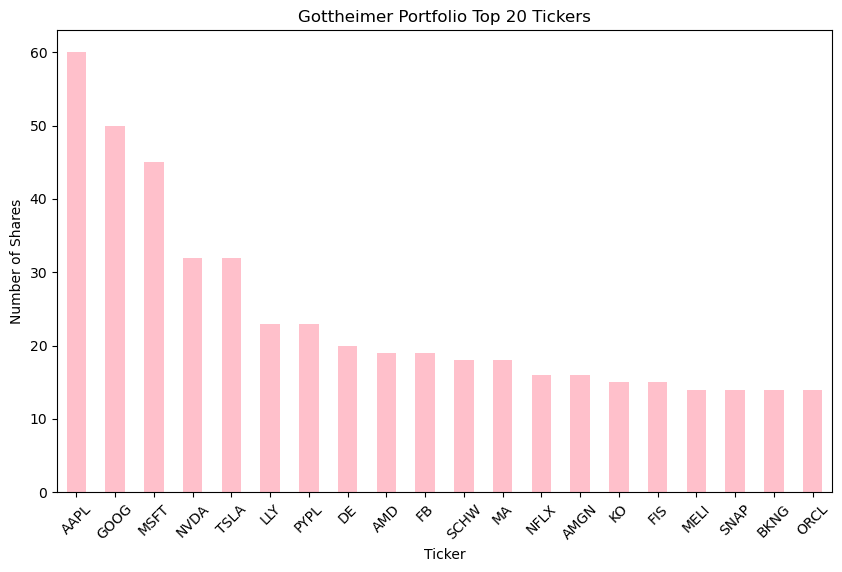

In [23]:
sorted_ticker_counts = ticker_counts_gottheimer.sort_values(ascending=False)
top_20_tickers = sorted_ticker_counts.head(20) 
plt.figure(figsize=(10, 6))
top_20_tickers.plot(kind='bar', color='pink')
plt.title('Gottheimer Portfolio Top 20 Tickers')
plt.xlabel('Ticker')
plt.ylabel('Number of Shares') 
plt.xticks(rotation=45)
plt.show()

In [24]:
lee_transactions
ticker_counts_lee = lee_transactions['Ticker'].value_counts()
ticker_counts_lee

Ticker
BLL     16
PLNT    14
SCI     13
OKE     12
DPZ     12
        ..
ANET     1
CWST     1
IAA      1
STAY     1
BP       1
Name: count, Length: 297, dtype: int64

In [25]:
lee_transactions_top5 = lee_transactions[(lee_transactions['Ticker']=='BLL')|(lee_transactions['Ticker']=='PLNT')|(lee_transactions['Ticker']=='SCI')|(lee_transactions['Ticker']=='OKE')|(lee_transactions['Ticker']=='DPZ')]
lee_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2022-11-30,SCI,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2022-11-30,PLNT,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2021-07-13,BLL,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2021-07-13,PLNT,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2021-07-07,BLL,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2019-02-27,PLNT,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2019-02-27,SCI,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2019-01-29,BLL,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"


In [26]:
lee_transactions_top5 = lee_transactions_top5.sort_index()
# Replace "BLL" with "BALL" in the "Ticker" column
lee_transactions_top5['Ticker'] = lee_transactions_top5['Ticker'].replace('BLL', 'BALL')
lee_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2019-01-16,PLNT,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2019-01-29,BALL,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2019-01-30,BALL,Susie Lee,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2019-02-27,PLNT,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2019-02-27,OKE,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2021-07-07,BALL,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2021-07-13,PLNT,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2021-07-13,BALL,Susie Lee,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


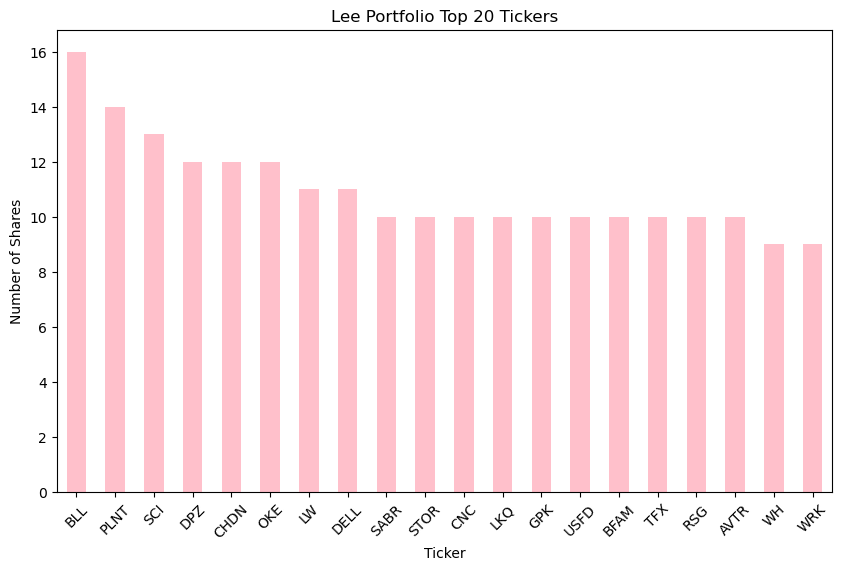

In [27]:
sorted_ticker_counts = ticker_counts_lee.sort_values(ascending=False)
top_20_tickers = sorted_ticker_counts.head(20) 
plt.figure(figsize=(10, 6))
top_20_tickers.plot(kind='bar', color='pink')
plt.title('Lee Portfolio Top 20 Tickers')
plt.xlabel('Ticker')
plt.ylabel('Number of Shares') 
plt.xticks(rotation=45)
plt.show()

In [28]:
foxx_transactions
ticker_counts_foxx = foxx_transactions['Ticker'].value_counts()
ticker_counts_foxx

Ticker
T        28
GSK      25
EPD      22
OLP      22
PPL      20
         ..
SCHZ      1
SPKEP     1
PSX       1
SCHD      1
HUM       1
Name: count, Length: 108, dtype: int64

In [29]:
foxx_transactions_top5 = foxx_transactions[(foxx_transactions['Ticker']=='T')|(foxx_transactions['Ticker']=='GSK')|(foxx_transactions['Ticker']=='EPD')|(foxx_transactions['Ticker']=='OLP')|(foxx_transactions['Ticker']=='PPL')]
foxx_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-08-02,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-03-01,GSK,Virginia Foxx,Sale,50001.0,R,Representatives,"$50,001-$100,000"
2023-02-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2022-03-14,PPL,Virginia Foxx,Sale,100001.0,R,Representatives,"$100,001-250,000"
2022-11-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2018-05-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-05-08,EPD,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-04-06,OLP,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"


In [30]:
foxx_transactions_top5 = foxx_transactions_top5.sort_index()
foxx_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2018-04-02,PPL,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-04-06,OLP,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-04-12,GSK,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-05-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2018-05-08,EPD,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2022-08-16,GSK,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2022-11-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-02-01,T,Virginia Foxx,Purchase,1001.0,R,Representatives,"$1,001-$15,000"


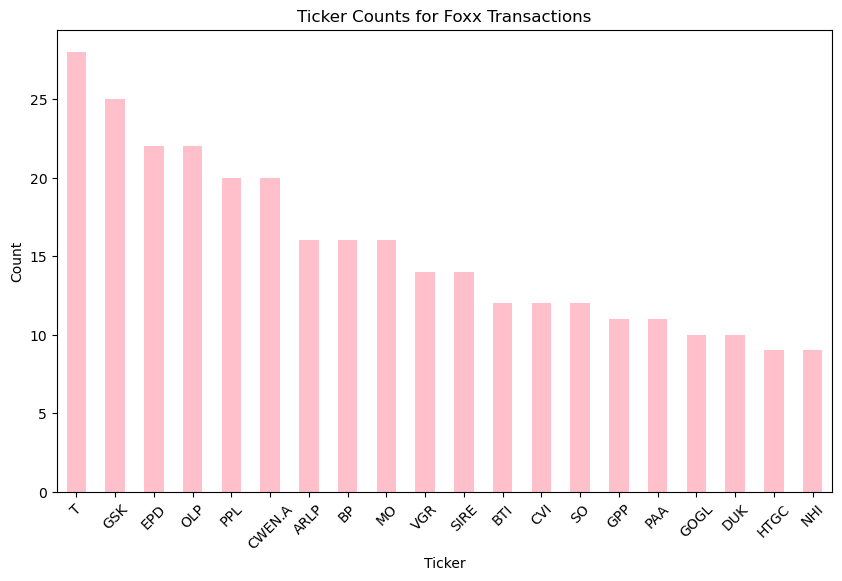

In [31]:
sorted_ticker_counts = ticker_counts_foxx.sort_values(ascending=False)
top_20_tickers = sorted_ticker_counts.head(20) 
plt.figure(figsize=(10, 6))
top_20_tickers.plot(kind='bar', color='pink')
plt.title('Ticker Counts for Foxx Transactions')
plt.xlabel('Ticker')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.show()

In [32]:
hern_transactions
ticker_counts_hern = hern_transactions['Ticker'].value_counts()
ticker_counts_hern

Ticker
HD       21
PXD      20
DVN      20
MSFT     20
TXN      20
         ..
FDRR      1
FHLC      1
GOOGL     1
TROW      1
CCT       1
Name: count, Length: 119, dtype: int64

In [33]:
hern_transactions_top5 = hern_transactions[(hern_transactions['Ticker']=='HD')|(hern_transactions['Ticker']=='PXD')|(hern_transactions['Ticker']=='DVN')|(hern_transactions['Ticker']=='MSFT')|(hern_transactions['Ticker']=='TXN')]
hern_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-29,DVN,Kevin Hern,Purchase,15001.0,R,Representatives,"$15,001-$50,000"
2023-09-29,DVN,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-21,PXD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2020-03-26,MSFT,Kevin Hern,Purchase,250001.0,R,Representatives,"$250,001-$1,000,000"
2020-03-26,TXN,Kevin Hern,Purchase,100001.0,R,Representatives,"$100,001-250,000"
2019-10-15,TXN,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"


In [34]:
hern_transactions_top5 = hern_transactions_top5.sort_index()
hern_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2019-10-15,MSFT,Kevin Hern,Purchase,15001.0,R,Representatives,"$15,001-$50,000"
2019-10-15,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2019-10-15,TXN,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2020-03-26,HD,Kevin Hern,Purchase,100001.0,R,Representatives,"$100,001-250,000"
2020-03-26,TXN,Kevin Hern,Purchase,100001.0,R,Representatives,"$100,001-250,000"
...,...,...,...,...,...,...,...
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-14,HD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"
2023-09-21,PXD,Kevin Hern,Purchase,1001.0,R,Representatives,"$1,001-$15,000"


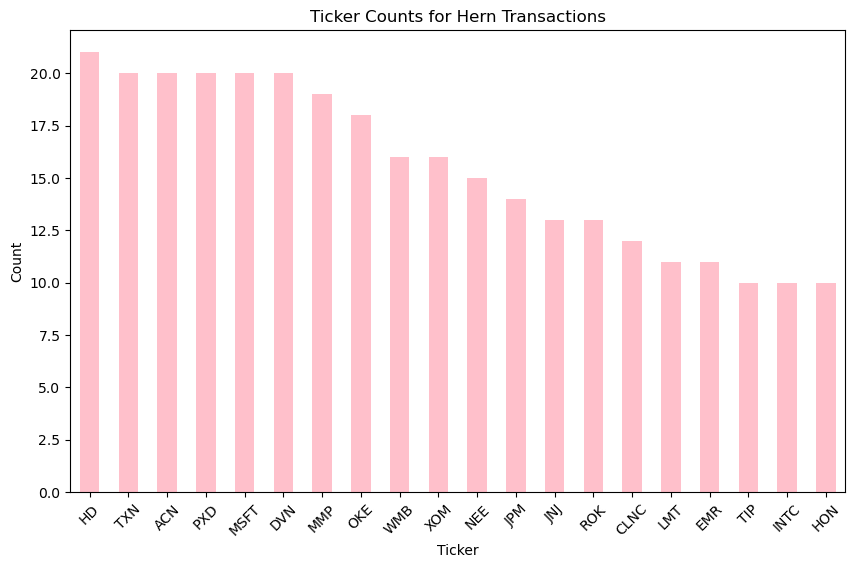

In [35]:
sorted_ticker_counts = ticker_counts_hern.sort_values(ascending=False)
top_20_tickers = sorted_ticker_counts.head(20) 
plt.figure(figsize=(10, 6))
top_20_tickers.plot(kind='bar', color='pink')
plt.title('Ticker Counts for Hern Transactions')
plt.xlabel('Ticker')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.show()

Starting with Josh Gottheimer's top 5 stocks.

In [36]:
gott_ticker_symbols = ['MSFT', 'AAPL', 'GOOG', 'TSLA', 'NVDA']
closing_prices_gott = pd.DataFrame()

# Define the date range
start_date_gott = '2017-05-01'
end_date_gott = '2023-09-27'

# Loop through unique tickers
for ticker_symbol in gott_ticker_symbols:
    ticker_data = yf.Ticker(ticker_symbol)
    historical_data = ticker_data.history(start=start_date_gott, end=end_date_gott)
    
    if not historical_data.empty:
        closing_prices_gott[ticker_symbol] = historical_data['Close']

# Reset the index of the DataFrame
closing_prices_gott.reset_index(inplace=True)
closing_prices_gott.to_csv('ticker_prices_gottheimer.csv', index=False)

In [37]:
gottheimer_closing = pd.read_csv(Path('ticker_prices_gottheimer.csv'))
for date in gottheimer_closing['Date'].head():
    print(date)

2017-05-01 00:00:00-04:00
2017-05-02 00:00:00-04:00
2017-05-03 00:00:00-04:00
2017-05-04 00:00:00-04:00
2017-05-05 00:00:00-04:00


In [38]:
gottheimer_closing['Date'] = gottheimer_closing['Date'].astype(str).str.replace('-05:00', '', regex=False)
gottheimer_closing['Date'] = gottheimer_closing['Date'].astype(str).str.replace('-04:00', '', regex=False)

In [39]:
gottheimer_closing

,Date,MSFT,AAPL,GOOG,TSLA,NVDA
0,2017-05-01 00:00:00,63.888470,34.296597,45.628502,21.521999,26.312416
1,2017-05-02 00:00:00,63.787251,34.514202,45.821999,21.259333,25.532711
2,2017-05-03 00:00:00,63.584728,34.408909,46.352001,20.734667,25.722702
3,2017-05-04 00:00:00,63.336216,34.284904,46.583000,19.697332,25.624002
4,2017-05-05 00:00:00,63.511089,34.853470,46.356499,20.556667,25.626476
...,...,...,...,...,...,...
1608,2023-09-20 00:00:00,320.769989,175.490005,134.589996,262.589996,422.390015
1609,2023-09-21 00:00:00,319.529999,173.929993,131.360001,255.699997,410.170013
1610,2023-09-22 00:00:00,317.010010,174.789993,131.250000,244.880005,416.100006
1611,2023-09-25 00:00:00,317.540009,176.080002,132.169998,246.990005,422.220001


In [40]:
for index_value in gottheimer_transactions_top5.index:
    print(index_value)

2017-05-01 00:00:00
2017-06-09 00:00:00
2017-08-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-08 00:00:00
2018-02-06 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-12 00:00:00
2018-02-16 00:00:00
2018-02-22 00:00:00
2018-04-24 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-07-02 00:00:00
2018-07-12 00:00:00
2018-08-02 00:00:00
2018-09-10 00:00:00
2018-09-14 00:00:00
2018-10-12 00:00:00
2018-11-27 00:00:00
2018-11-28 00:00:00
2019-01-03 00:00:00
2019-01-18 00:00:00
2019-04-05 00:00:00
2019-04-26 00:00:00
2019-04-30 00:00:00
2019-04-30 00:00:00
2019-05-20 00:00:00
2019-06-06 00:00:00
2019-06-06 00:00:00
2019-06-12 00:00:00
2019-07-16 00:00:00
2019-07-16 00:00:00
2019-07-26 00:00:00
2019-09-11 00:00:00
2019-09-13 00:00:00
2019-10-07 00:00:00
2019-10-24 00:00:00
2019-10-25 00:00:00
2019-10-28 00:00:00
2019-11-05 00:00:00
2019-11-07 00:00:00
2019-11-07 00:00:00
2019-11-11 00:00:00
2019-11-19 00:00:00
2020-01-09 00:00:00
2020-01-14 00:00:00
2020-01-16 00:00:00


In [41]:
gottheimer_closing['Date'] = gottheimer_closing['Date'].apply(lambda x: parser.parse(x).strftime('%Y-%m-%d'))

In [42]:
gottheimer_transactions_top5.index = pd.DatetimeIndex(gottheimer_transactions_top5.index)
gottheimer_transactions_top5.index = gottheimer_transactions_top5.index.strftime('%Y-%m-%d')

In [43]:
gottheimer_transactions_top5

,Ticker,Representative,Transaction,Amount,Party,House,Range
TransactionDate,,,,,,,
2017-05-01,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2017-06-09,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2017-08-02,AAPL,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2018-01-03,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2018-01-04,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
...,...,...,...,...,...,...,...
2023-08-14,GOOG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-11,NVDA,Josh Gottheimer,Sale,1001.0,D,Representatives,"$1,001-$15,000"
2023-09-15,GOOG,Josh Gottheimer,Purchase,1001.0,D,Representatives,"$1,001-$15,000"


In [45]:
# Initialize dictionaries to store transaction details
transaction_counts_gott = {}
profits_gott = {}
shares_bought_gott = 0
shares_sold_gott = 0

# Iterate through the rows in your DataFrame
for index, row in gottheimer_transactions_top5.iterrows():
    ticker_gott = row['Ticker']                                       
    transaction_date_gott = index                             
    transaction_type_gott = row['Transaction']
    amount_gott = row['Amount']
    
    # Check if the ticker is in the stock_prices DataFrame
    if ticker_gott in gottheimer_closing.columns:
        # Get the stock price for the transaction date
        stock_price_gott = gottheimer_closing.loc[gottheimer_closing['Date'] == transaction_date_gott][ticker_gott].values[0]

        # Calculate shares bought or sold and the transaction value
        if transaction_type_gott == 'Purchase':
            shares_bought_gott = amount_gott / stock_price_gott
            transaction_value_gott = -shares_bought_gott  # A negative amount for purchases
        elif transaction_type_gott == 'Sale':
            shares_sold_gott = amount_gott / stock_price_gott
            transaction_value_gott = shares_sold_gott
        else:
            continue  # Skip transactions that are not sales or purchases

        # Update transaction counts and profits for the ticker
        if ticker_gott not in transaction_counts_gott:
            transaction_counts_gott[ticker_gott] = 0
            profits_gott[ticker_gott] = 0

        transaction_counts_gott[ticker_gott] += shares_bought_gott - shares_sold_gott
        profits_gott[ticker_gott] += transaction_value_gott

# Print transaction counts and profits for each ticker
for ticker_gott in transaction_counts_gott:
    print(f'Ticker: {ticker_gott}')
    print(f'Shares Bought/Sold: {transaction_counts_gott[ticker_gott]}')
    print(f'Profit/Loss: {profits_gott[ticker_gott]}\n')

Ticker: AAPL
Shares Bought/Sold: 1863.71261542779
Profit/Loss: -11998.0

Ticker: NVDA
Shares Bought/Sold: 906.0293105497387
Profit/Loss: 8008.0

Ticker: MSFT
Shares Bought/Sold: 2251.4896383625464
Profit/Loss: -157003.0

Ticker: GOOG
Shares Bought/Sold: 1832.701410469503
Profit/Loss: 4004.0

Ticker: TSLA
Shares Bought/Sold: 1095.5221928447615
Profit/Loss: 14014.0



In [46]:
lee_ticker_symbols = ['BALL', 'PLNT', 'SCI', 'OKE', 'DPZ']
closing_prices_lee = pd.DataFrame()

# Define the date range
start_date_lee = '2019-01-16'
end_date_lee = '2022-12-01'

# Loop through unique tickers
for ticker_symbol in lee_ticker_symbols:
    ticker_data = yf.Ticker(ticker_symbol)
    historical_data = ticker_data.history(start=start_date_lee, end=end_date_lee)
    
    if not historical_data.empty:
        closing_prices_lee[ticker_symbol] = historical_data['Close']

# Reset the index of the DataFrame
closing_prices_lee.reset_index(inplace=True)
closing_prices_lee.to_csv('ticker_prices_lee.csv', index=False)
lee_closing = pd.read_csv(Path('ticker_prices_lee.csv'))
lee_closing['Date'] = lee_closing['Date'].astype(str).str.replace('-05:00', '', regex=False)
lee_closing['Date'] = lee_closing['Date'].astype(str).str.replace('-04:00', '', regex=False)
lee_closing['Date'] = lee_closing['Date'].apply(lambda x: parser.parse(x).strftime('%Y-%m-%d'))
lee_transactions_top5.index = pd.DatetimeIndex(lee_transactions_top5.index)
lee_transactions_top5.index = lee_transactions_top5.index.strftime('%Y-%m-%d')
# Initialize dictionaries to store transaction details
transaction_counts_lee = {}
profits_lee = {}
shares_bought_lee = 0
shares_sold_lee = 0

# Iterate through the rows in your DataFrame
for index, row in lee_transactions_top5.iterrows():
    ticker = row['Ticker']
    transaction_date = index
    transaction_type = row['Transaction']
    amount = row['Amount']
    
    # Check if the ticker is in the stock_prices DataFrame
    if ticker in lee_closing.columns:
        # Get the stock price for the transaction date
        stock_price = lee_closing.loc[lee_closing['Date'] == transaction_date][ticker].values[0]

        # Calculate shares bought or sold and the transaction value
        if transaction_type == 'Purchase':
            shares_bought_lee = amount / stock_price
            transaction_value = -amount  # A negative amount for purchases
        elif transaction_type == 'Sale':
            shares_sold_lee = amount / stock_price
            transaction_value = amount
        else:
            continue  # Skip transactions that are not sales or purchases

        # Update transaction counts and profits for the ticker
        if ticker not in transaction_counts_lee:
            transaction_counts_lee[ticker] = 0
            profits_lee[ticker] = 0

        transaction_counts_lee[ticker] += shares_bought_lee - shares_sold_lee
        profits_lee[ticker] += transaction_value

# Print transaction counts and profits for each ticker
for ticker in transaction_counts_lee:
    print(f'Ticker: {ticker}')
    print(f'Shares Bought/Sold: {transaction_counts_lee[ticker]}')
    print(f'Profit/Loss: {profits_lee[ticker]}\n')

Ticker: PLNT
Shares Bought/Sold: 6.648058011032246
Profit/Loss: -2002.0

Ticker: BALL
Shares Bought/Sold: -29.351307801167117
Profit/Loss: 4004.0

Ticker: OKE
Shares Bought/Sold: 24.217502618012034
Profit/Loss: -2002.0

Ticker: DPZ
Shares Bought/Sold: 7.819641535215034
Profit/Loss: 0.0

Ticker: SCI
Shares Bought/Sold: -33.06037547052608
Profit/Loss: 1001.0

